In [16]:
import numpy as np
import torch
import torchvision
from matplotlib import pyplot as plt
from matplotlib import cm
from conv_sparse_model import ConvSparseLayer

from train_conv_sparse_model import load_mnist_data
from train_conv_sparse_model import plot_filters

In [17]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
if device == "cpu":
    batch_size = 8
else:
    batch_size = 64

train_loader = load_mnist_data(batch_size)
example_data, example_targets = next(iter(train_loader))
example_data = example_data.to(device)

sparse_layer = ConvSparseLayer(in_channels=1,
                               out_channels=64,
                               kernel_size=8,
                               stride=1,
                               padding=0,
                               lam=1.0, 
                               activation_lr=1e-2
                               )
sparse_layer.to(device)

learning_rate = 1e-3
filter_optimizer = torch.optim.Adam(sparse_layer.parameters(),
                                   lr=learning_rate)

In [18]:
for epoch in range(3):
    for local_batch, local_labels in train_loader:
        local_batch = local_batch.to(device)
        local_labels = local_labels.to(device)
        activations = sparse_layer(local_batch[:, :, :, :])
        loss = sparse_layer.loss(local_batch[:, :, :, :], activations)
        print('loss={}'.format(loss))

        filter_optimizer.zero_grad()
        loss.backward()
        filter_optimizer.step()
        sparse_layer.normalize_weights()

loss=259.81781005859375
loss=264.2007751464844
loss=259.4970397949219
loss=252.88868713378906
loss=247.01113891601562
loss=249.4160919189453
loss=250.54766845703125
loss=243.82131958007812
loss=247.74388122558594
loss=239.58444213867188
loss=239.09335327148438
loss=229.7723388671875
loss=233.4356689453125
loss=227.7008514404297
loss=227.8053436279297
loss=228.56996154785156
loss=224.37847900390625
loss=220.64126586914062
loss=216.30703735351562
loss=222.11538696289062
loss=216.2417449951172
loss=221.6421661376953
loss=214.091064453125
loss=212.2515869140625
loss=210.81265258789062
loss=209.45404052734375
loss=205.65098571777344
loss=205.97576904296875
loss=198.07884216308594
loss=202.74014282226562
loss=198.4846954345703
loss=208.12757873535156
loss=206.0067596435547
loss=198.8477783203125
loss=198.7198028564453
loss=199.00164794921875
loss=192.2158966064453
loss=190.43447875976562
loss=194.2358856201172
loss=183.6068115234375
loss=189.5879364013672
loss=189.34800720214844
loss=189.233

SHAPES
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])


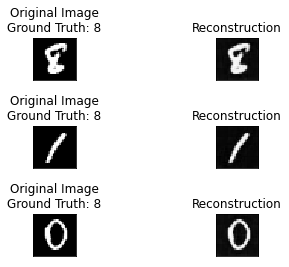

In [21]:
activations = sparse_layer(example_data)
reconstructions = sparse_layer.reconstructions(
    activations).cpu().detach().numpy()

print("SHAPES")
print(example_data.shape)
print(example_data.shape)

fig = plt.figure()

img_to_show = 3
for i in range(img_to_show):
    # original
    plt.subplot(img_to_show, 2, i*2 + 1)
    plt.tight_layout()
    plt.imshow(example_data[i, 0, :, :].cpu().detach().numpy(), cmap='gray',
               interpolation='none')
    plt.title("Original Image\nGround Truth: {}".format(
        example_targets[0]))
    plt.xticks([])
    plt.yticks([])

    # reconstruction
    plt.subplot(img_to_show, 2, i*2 + 2)
    plt.tight_layout()
    plt.imshow(reconstructions[i, 0, :, :], cmap='gray',
               interpolation='none')
    plt.title("Reconstruction")
    plt.xticks([])
    plt.yticks([])

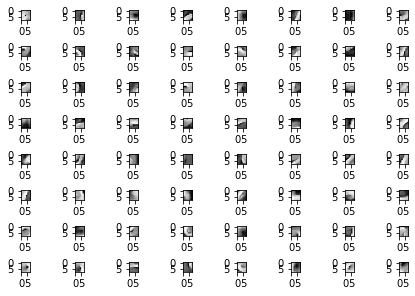

In [22]:
plot_filters(sparse_layer.filters.cpu().detach())